### Algorithmes

In [1]:
import random
from math import sqrt
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.special import erfinv
from scipy.stats import kurtosis, skew
from statsmodels.graphics.gofplots import qqplot_2samples


def runif(n: int, low: float = 0, high: float = 1) -> np.ndarray:
    return np.array(np.random.uniform(low=low, high=high, size=n))


def qqplot(x, y):
    pp_x = sm.ProbPlot(x)
    pp_y = sm.ProbPlot(y)
    qqplot_2samples(pp_x, pp_y, line="45")
    plt.show()


# méthode inverse
# théorème central limite

def loi_normale_inv(n: int) -> np.ndarray:
    x = runif(n)
    return sqrt(2) * erfinv(2 * x - 1)


# def loi_normale_centrale_limite(n: int) -> np.ndarray:
#     vect = []
#     for i in range(n):
#         x = [random.uniform(0, 1) for _ in range(12)]
#         vect.append(sum(x) - 6)
#     return np.array(vect)

def loi_normale_centrale_limite(n: int) -> np.ndarray:
    vect = []
    for i in range(n):
        x = runif(n)
        vect.append((sum(x) - n / 2) / sqrt(n / 12))
    return np.array(vect)

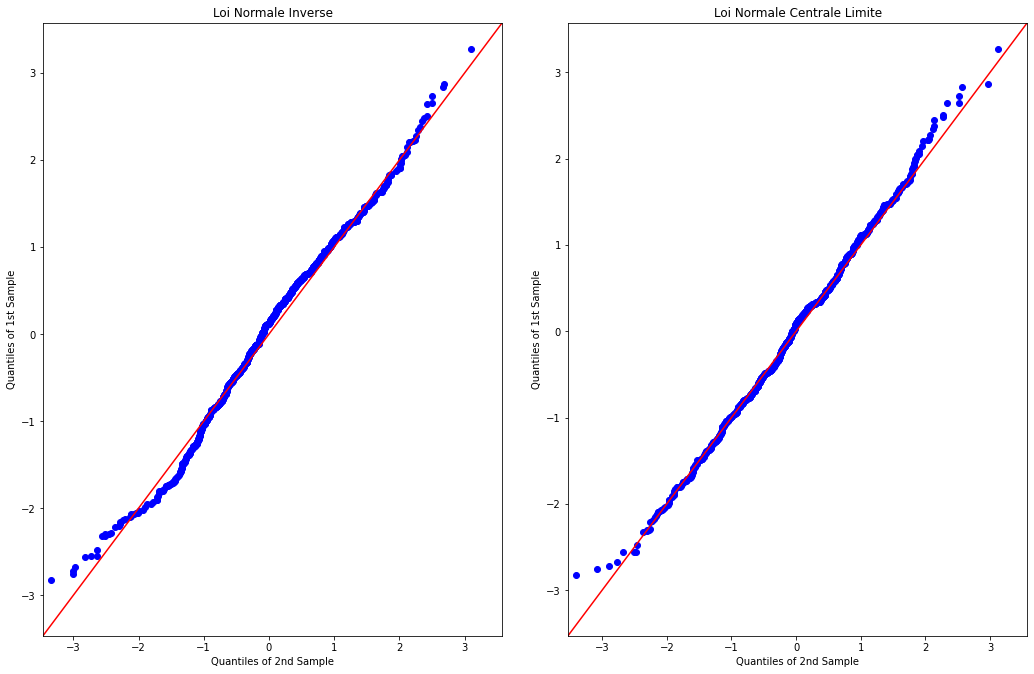

In [2]:
NAMES = ['Loi Normale Inverse', 'Loi Normale Centrale Limite']

n = 1000

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 10)

pp_x1 = sm.ProbPlot(loi_normale_inv(n))
pp_y1 = sm.ProbPlot(loi_normale_inv(n))
qqplot_2samples(pp_x1, pp_y1, line="45", ax=axes[0])
axes[0].title.set_text(NAMES[0])

pp_x2 = sm.ProbPlot(loi_normale_centrale_limite(n))
pp_y2 = sm.ProbPlot(loi_normale_centrale_limite(n))
qqplot_2samples(pp_x1, pp_y2, line="45", ax=axes[1])
axes[1].title.set_text(NAMES[1])

fig.tight_layout(pad=3.0)
plt.show()

/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


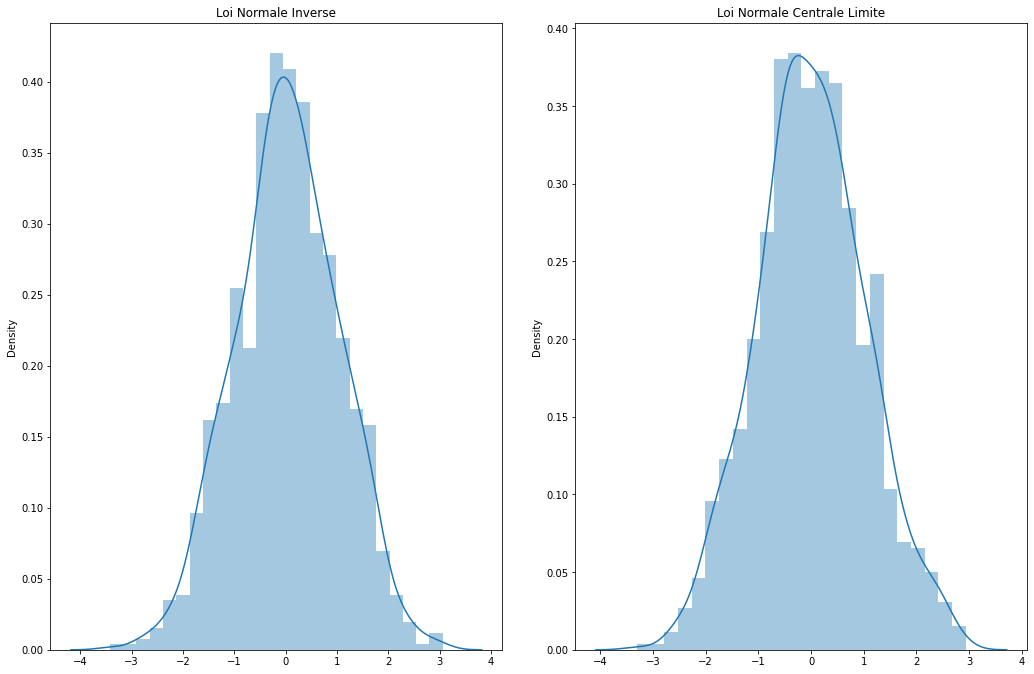

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 10)
sns.distplot(loi_normale_inv(n), ax=axes[0])
axes[0].title.set_text(NAMES[0])
sns.distplot(loi_normale_centrale_limite(n), ax=axes[1])
axes[1].title.set_text(NAMES[1])
fig.tight_layout(pad=3.0)
plt.show()

In [4]:
distributions = [loi_normale_inv(n), loi_normale_centrale_limite(n)]

data = {'Quartile 25%': [np.percentile(sublist, 25) for sublist in distributions],
        'Mean value': [mean(sublist) for sublist in distributions],
        'Quartile 75%': [np.percentile(sublist, 50) for sublist in distributions],
        'Variance': [np.var(sublist) for sublist in distributions],
        'Kurtosis (normalised)': [kurtosis(sublist) for sublist in distributions],
        'Skewness': [skew(sublist) for sublist in distributions]}

pd.DataFrame.from_dict(data, orient='index', columns=NAMES)

,Loi Normale Inverse,Loi Normale Centrale Limite
Quartile 25%,-0.635241,-0.739914
Mean value,0.028399,-0.017835
Quartile 75%,0.041898,-0.019168
Variance,0.961171,1.030683
Kurtosis (normalised),-0.121417,0.072043
Skewness,-0.004171,-0.100084


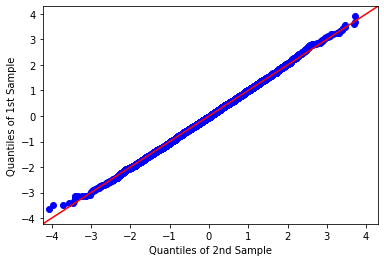

/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


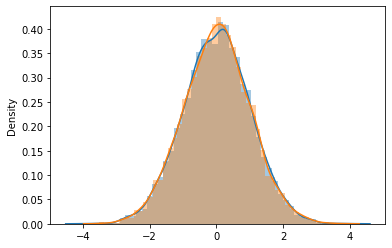

In [5]:
from math import pi


def box_muller(n: int):
    x1 = runif(n)
    x2 = runif(n)
    y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * pi * x2)
    y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * pi * x2)
    return y1, y2


y1, y2 = box_muller(10_000)
pp_x1 = sm.ProbPlot(y1)
pp_y1 = sm.ProbPlot(y2)
qqplot_2samples(pp_x1, pp_y1, line="45")
plt.show()

y1, y2 = box_muller(10_000)
ax = sns.distplot(y1)
ax = sns.distplot(y2)

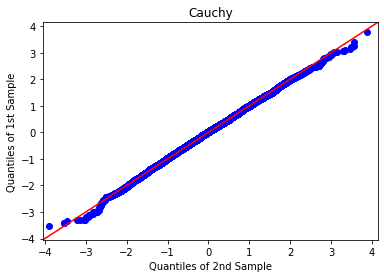

/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


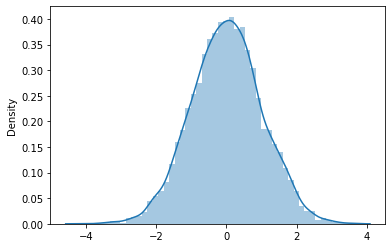

In [6]:
from math import exp, tan, e, log


def gaussian_density(x):
    a = 1 / (sqrt(2) * pi)
    b = exp(-x * x / 2)
    return a * b


def cauchy(n: int) -> np.ndarray:
    res = [0 for _ in range(n)]
    c = sqrt(2 * pi / e)

    for i in range(n):
        u1 = random.uniform(0, 1)
        x = tan(pi * (u1 - 1 / 2))
        u2 = random.uniform(0, 1)
        res[i] = x

        while c * u2 / (pi * (1 + x * x)) > gaussian_density(x):
            u1 = random.uniform(0, 1)
            x = tan(pi * (u1 - 1 / 2))
            u2 = random.uniform(0, 1)
            res[i] = x

    return np.array(res)


pp_x1 = sm.ProbPlot(cauchy(10_000))
pp_y1 = sm.ProbPlot(cauchy(10_000))
qqplot_2samples(pp_x1, pp_y1, line="45")
plt.title('Cauchy')
plt.show()

sns.distplot(cauchy(10_000))

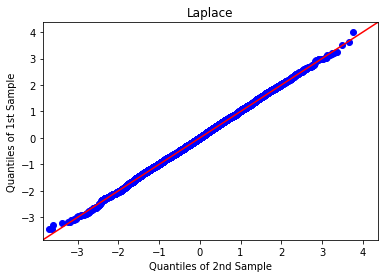

/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


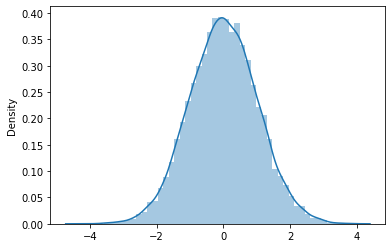

In [7]:
def laplace(n: int) -> np.ndarray:
    res = [0 for _ in range(n)]
    c = 2 * (sqrt(e / 2 * pi))
    b = 1
    mu = 0

    for i in range(n):
        u1 = random.uniform(0, 1)
        x = mu - b * np.sign(u1 - 0.5) * log(1 - 2 * abs(u1 - 0.5))
        u2 = random.uniform(0, 1)
        res[i] = x

        while c * u2 * 1 / 2 * exp(-abs(x)) > gaussian_density(x):
            u1 = random.uniform(0, 1)
            x = mu - b * np.sign(u1 - 0.5) * log(1 - 2 * abs(u1 - 0.5))
            u2 = random.uniform(0, 1)
            res[i] = x

    return np.array(res)


pp_x1 = sm.ProbPlot(laplace(10_000))
pp_y1 = sm.ProbPlot(laplace(10_000))
qqplot_2samples(pp_x1, pp_y1, line="45")
plt.title('Laplace')
plt.show()

sns.distplot(laplace(10_000))

# + loi de poisson